<a href="https://colab.research.google.com/github/Grecia329/EcuacionesDiferencialesParciales-/blob/main/M%C3%A9todo_de_M%C3%ADnimos_Cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Mínimos Cuadrados

Definimos el problema como:
$$
u'' + u = x \quad u(0) = 0 \quad \text{&} \quad u'(0) = 2
$$
Bajo la forma aproximada:
$$
u_N(x) = a_0 + a_1x +a_2x^2 + a_3x^3
$$

Vamos a determinar $a_0$ y $a_1$ a partir de las condiciones iniciales.
$$
u(0) = 0 , \quad u'(0) = 2
$$
De $u_N(0) = 0 ⇒ a_0 = 0
$

Vamos a derivar:
$$
u'_N (x) = a_1 + 2a_2x + 3a_3 x^2
$$
Donde $u'_N (0) = 2 ⇒ a_1 = 2$

Entonces:
$u_N(x) = 2x + a_2x^2+a_3x^3$

Determinemos el **residuo**:

Calculamos las derivadas:
$$
u'_N(x) = 2 + 2a_2x + 3a_3x^2 \\
u''_N(x) = 2a_2 + 6a_3x
$$
Residuo:
$$
ϵ(x) = 2a_2 + (6a_3 +1)x + a_2x^2+a_3x^3
$$

Agrupando términos:
$$
ϵ(x) = 2a_2 + (6a_3 +1)x + a_2x^2+a_3x^3
$$

Aplicamos **Condiciones de Mínimos Cuadrados:**

Definimos:
$$
J(a_2,a_3) = ∫_{0}^{1}ϵ(x)^2dx
$$
Donde el mínimo de J se obtiene cuando:
$$
\frac{∂J}{∂a_2}= 0 \quad \frac{∂J}{∂a_3}=0
$$

Resolvemos:
$$
\frac{\partial J}{\partial a_i} = 2 ∫_{0}^{1}ϵ(x) \frac{∂ ϵ}{∂ a_i} (x) dx
$$

Las ecuaciones resultantes son:
$$
∫_{0}^{1}ϵ(x) \frac{∂ ϵ}{∂ a_2} (x) dx = 0 \quad  ∫_{0}^{1}ϵ(x) \frac{∂ ϵ}{∂ a_3} (x) dx = 0
$$

Calculamos las derivadas parciales:
$$
\frac{∂ ϵ}{∂ a_2} = 2 + x^2 \quad \frac{∂ ϵ}{∂ a_3} = 6x+x^3
$$

Primera ecuación:
$$
∫_{0}^{1}ϵ (2+x^2)dx = 0
$$
Multiplacamos por $2+x^2$
$$
ϵ(x)(2+x^2) = (2a_2 +(6a_3+1)x+ a_2x^2 +  a_3x^3)(2+x^2)
$$
Haciendo el producto y agrupando por potencias de $x$, tenemos:
$$
ϵ(x) (2+x^2) = 4a_2 + (12a_3 +2 ) x +3a_2x^2 + (8a_3+1)x^3 +a_2x^4+ a_3x^5
$$

Integramos de 0 a 1:
$$
∫_{0}^{1}
 ϵ(x) (2+x^2) dx= 4a_2∫_{0}^{1}dx + (12a_3 +2 )∫_{0}^{1} x dx +3a_2 ∫_{0}^{1} x^2dx + (8a_3+1)∫_{0}^{1}x^3dx +a_2∫_{0}^{1}x^4dx+ a_3∫_{0}^{1}x^5dx
$$

Sumando y simplificando se obtiene:
$$
\frac{83}{15}a_2 + \frac{49}{6}a_3 + \frac{5}{4} = 0
$$

Mientras que para la segunda ecuación es de la forma:
$$
∫_{0}^{1} ϵ(6x+x^3)dx  = \frac{49}{6}a_2+\frac{509}{35}a_3 + \frac{11}{5}
$$

Es decir, tenemos el siguiente sistema de ecuaciones:
$$
\frac{83}{15}a_2+\frac{49}{6}a_3 + \frac{5}{4} = 0
$$
$$
\frac{49}{6}a_2+\frac{509}{35}a_3 + \frac{11}{5} = 0
$$

Donde la solución del sistema es de la forma:
$$
a_2 = -\frac{1335}{86789} ≈ -0.01538 \quad a_3 = -\frac{2
4759}{173578} ≈ -0.14264
$$

Recordando que $a_0=0$ y $a_1=2$, entonces:
$$
U_N(x) = 2x  -\frac{1335}{86789} x^2 - \frac{24759}{173578} x^3 ≈2x - 0.01538x^2 -0.14264x^3
$$
La cual es la **solución analítica** por mínimos cuadrados.

# Código

**Importaciones y Solución Exacta**:

In [1]:
# ======================================================
# EDO: u'' + u = x,  u(0)=0, u'(0)=2
# ======================================================

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Variable y función desconocida
x = sp.symbols('x')
u = sp.Function('u')

# EDO: u'' + u = x
ode = sp.Eq(sp.diff(u(x), x, 2) + u(x), x)

# Solución exacta (la misma del Ejercicio 5.1)
sol_exacta = sp.dsolve(
    ode,
    ics={u(0): 0, sp.diff(u(x), x).subs(x, 0): 2}
)

print("Solución exacta u(x):")
sp.pprint(sol_exacta)

u_exact_expr = sol_exacta.rhs
u_exact_num = sp.lambdify(x, u_exact_expr, "numpy")


Solución exacta u(x):
u(x) = x + sin(x)


**Propuesta de Solución y Residuo:**

In [2]:
# ======================================================
# Construcción de u_N(x) y residuo ε(x)
#    u_N(x) = a0 + a1 x + a2 x^2 + a3 x^3
# ======================================================

# De las condiciones iniciales:
# u_N(0) = 0  =>  a0 = 0
# u'_N(0) = 2 =>  a1 = 2

a2, a3 = sp.symbols('a2 a3')

u_N = 2*x + a2*x**2 + a3*x**3              # polinomio cúbico
uN_2 = sp.diff(u_N, x, 2)                   # segunda derivada
eps = uN_2 + u_N - x                        # residuo ε(x)

print("u_N(x) =")
sp.pprint(u_N)
print("\nResiduo ε(x) = u_N'' + u_N - x:")
sp.pprint(eps)


u_N(x) =
    2       3      
a₂⋅x  + a₃⋅x  + 2⋅x

Residuo ε(x) = u_N'' + u_N - x:
    2       3                      
a₂⋅x  + a₃⋅x  + x + 2⋅(a₂ + 3⋅a₃⋅x)


**Funcional de mínimos cuadrados y sistema para $a_2$ y $a_3$**

In [3]:
# ======================================================
#    J(a2,a3) = ∫_0^1 [ε(x)]^2 dx
#    Condiciones de optimalidad:
#    ∂J/∂a2 = 0,  ∂J/∂a3 = 0
# ======================================================

J = sp.integrate(eps**2, (x, 0, 1))   # integral del error cuadrático
J_simpl = sp.simplify(J)

print("Funcional de mínimos cuadrados J(a2,a3) = ∫_0^1 ε(x)^2 dx:")
sp.pprint(J_simpl)

# Derivadas parciales
dJ_da2 = sp.diff(J_simpl, a2)
dJ_da3 = sp.diff(J_simpl, a3)

print("\n∂J/∂a2 =")
sp.pprint(dJ_da2)
print("\n∂J/∂a3 =")
sp.pprint(dJ_da3)

# Sistema normal: ∂J/∂a2 = 0, ∂J/∂a3 = 0
sol_a2a3 = sp.solve((sp.Eq(dJ_da2, 0), sp.Eq(dJ_da3, 0)), (a2, a3))
sol_a2a3


Funcional de mínimos cuadrados J(a2,a3) = ∫_0^1 ε(x)^2 dx:
     2                           2            
83⋅a₂    49⋅a₂⋅a₃   5⋅a₂   509⋅a₃    22⋅a₃   1
────── + ──────── + ──── + ─────── + ───── + ─
  15        3        2       35        5     3

∂J/∂a2 =
166⋅a₂   49⋅a₃   5
────── + ───── + ─
  15       3     2

∂J/∂a3 =
49⋅a₂   1018⋅a₃   22
───── + ─────── + ──
  3       35      5 


{a2: -1335/86789, a3: -24759/173578}

**Aproximación por mínimos cuadrados**:

In [4]:
# ======================================================
# Sustituimos a2, a3 en u_N(x)
# ======================================================

u_ls = sp.simplify(u_N.subs(sol_a2a3))   # u_N por mínimos cuadrados

print("Aproximación por mínimos cuadrados u_LS(x) =")
sp.pprint(u_ls)

u_ls_num = sp.lambdify(x, u_ls, "numpy")

Aproximación por mínimos cuadrados u_LS(x) =
  ⎛         2                  ⎞
x⋅⎝- 24759⋅x  - 2670⋅x + 347156⎠
────────────────────────────────
             173578             


**Graficamos la solución analítica Vs la Solución exacta**

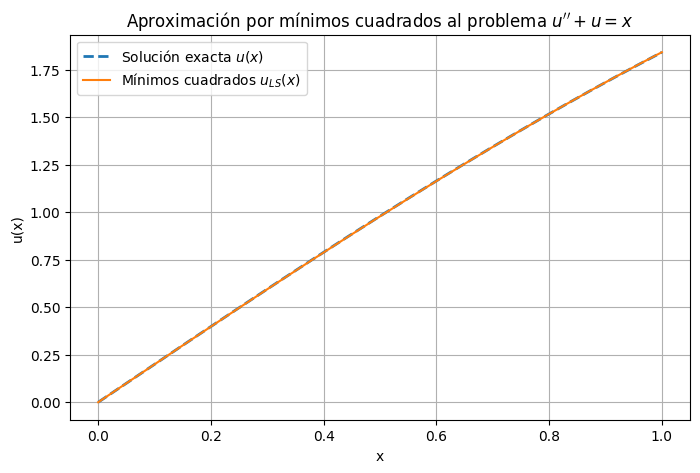

In [5]:
# Gráfica: solución exacta vs mínimos cuadrados en [0,1]

import numpy as np
import matplotlib.pyplot as plt

xx = np.linspace(0, 1, 400)
yy_exact = u_exact_num(xx)
yy_ls = u_ls_num(xx)

plt.figure(figsize=(8, 5))
plt.plot(xx, yy_exact, "--", linewidth=2, label="Solución exacta $u(x)$")
plt.plot(xx, yy_ls, label="Mínimos cuadrados $u_{LS}(x)$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Aproximación por mínimos cuadrados al problema $u''+u=x$")
plt.grid(True)
plt.legend()
plt.show()


A continuación vamos a definir una **tabla de errores** de la solución exacta VS mínimos cuadrados, dentro del intervalo [0,1]:

In [7]:
# Tabla de errores: solución exacta vs mínimos cuadrados

import numpy as np
import pandas as pd

puntos = np.array([0.0, 0.25, 0.50, 0.75, 1.0])

datos = {
    "x": puntos,
    "u_exacta(x)": u_exact_num(puntos),
    "u_LS(x)": u_ls_num(puntos),
}

df_err = pd.DataFrame(datos)
df_err["|error_LS| = |u - u_LS|"] = np.abs(df_err["u_exacta(x)"] - df_err["u_LS(x)"])

df_err


,x,u_exacta(x),u_LS(x),|error_LS| = |u - u_LS|
0,0.00,0.000000,0.000000,0.000000
1,0.25,0.497404,0.496810,0.000594
2,0.50,0.979426,0.978325,0.001101
3,0.75,1.431639,1.431172,0.000467
4,1.00,1.841471,1.841979,0.000508


# Comparación con el Ejercicio 5.1

In [9]:
# ======================================================
# Comparamos con
#   la solución por colocación del Ejercicio 5.1
# ======================================================

u_ls = sp.simplify(u_N.subs(sol_a2a3))   # u_N por mínimos cuadrados

print("Aproximación por mínimos cuadrados u_LS(x) =")
sp.pprint(u_ls)

u_ls_num = sp.lambdify(x, u_ls, "numpy")

# Aproximación por colocación (Ejercicio 5.1):
# u_col(x) = 2x - (1/17)x^2 - (2/17)x^3
u_col = 2*x - x**2/sp.Integer(17) - 2*x**3/sp.Integer(17)
print("\nAproximación por colocación u_col(x) =")
sp.pprint(u_col)

u_col_num = sp.lambdify(x, u_col, "numpy")


Aproximación por mínimos cuadrados u_LS(x) =
  ⎛         2                  ⎞
x⋅⎝- 24759⋅x  - 2670⋅x + 347156⎠
────────────────────────────────
             173578             

Aproximación por colocación u_col(x) =
     3    2      
  2⋅x    x       
- ──── - ── + 2⋅x
   17    17      


**Gráficamos La solución exacta Vs La solución analítica tanto por mínimos Cuadrados como por Colocación**

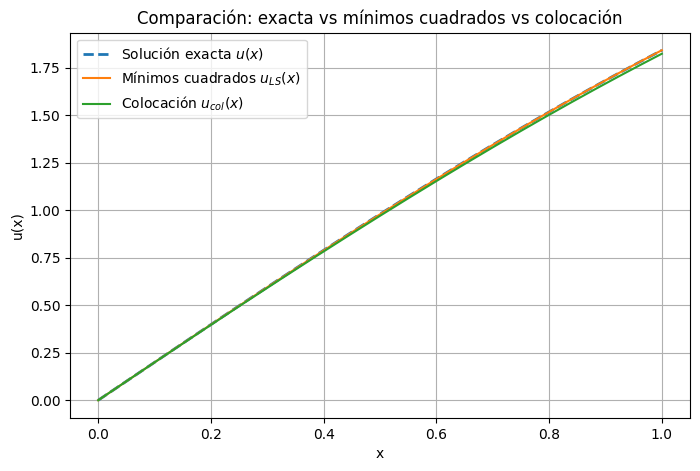

In [10]:
# ======================================================
# Gráfica comparativa en [0,1]
# ======================================================

xx = np.linspace(0, 1, 400)
yy_exact = u_exact_num(xx)
yy_ls = u_ls_num(xx)
yy_col = u_col_num(xx)

plt.figure(figsize=(8, 5))
plt.plot(xx, yy_exact, "--", label="Solución exacta $u(x)$", linewidth=2)
plt.plot(xx, yy_ls, label="Mínimos cuadrados $u_{LS}(x)$")
plt.plot(xx, yy_col, label="Colocación $u_{col}(x)$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Comparación: exacta vs mínimos cuadrados vs colocación")
plt.grid(True)
plt.legend()
plt.show()


**Tabla de Errores y comparación numérica entre la solución exacta, y la solución por ambos métodos**

In [11]:
# ======================================================
# Tabla de errores en puntos representativos
# ======================================================

puntos = np.array([0, 0.25, 0.50, 0.75, 1.0])

datos = {
    "x": puntos,
    "u_exacta(x)": u_exact_num(puntos),
    "u_LS(x)": u_ls_num(puntos),
    "u_col(x)": u_col_num(puntos),
}

df = pd.DataFrame(datos)
df["|error_LS|"] = np.abs(df["u_exacta(x)"] - df["u_LS(x)"])
df["|error_col|"] = np.abs(df["u_exacta(x)"] - df["u_col(x)"])
df


,x,u_exacta(x),u_LS(x),u_col(x),|error_LS|,|error_col|
0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.25,0.497404,0.496810,0.494485,0.000594,0.002919
2,0.50,0.979426,0.978325,0.970588,0.001101,0.008837
3,0.75,1.431639,1.431172,1.417279,0.000467,0.014359
4,1.00,1.841471,1.841979,1.823529,0.000508,0.017942


Podemos observar que el método de colocación (Ejercicio 5.1) los coeficientes se eligen para que el residuo cumpla $ϵ(x) = 0$ en puntos específicos del intervalo. Lo cual garantiza que la aproximación coincida exactamente con la solución excata en esos puntos, pero no controla directamente el error en el resto del inervalo.


Sin embargo el **método de mínimos cuadrados** (Ejercicio 5.8) se minimiza el funcional:
$$
J(a_2, a_3) = ∫_{0}^{1} ϵ(x) ^2dx
$$
De modo que el residuo sea más pequeño en todo el intervalo [0,1].
Comparando ambos métodos podemos observar que producen errores pequeños, en este problema la aproximación obtenida por mínimos cuadrados ofrece un ajuste global más preciso en todo el intervalo [0,1] que la aproximación por colocación, cuya precisión es mayor solo en los puntos de colocación elegidos.

# Conclusiones:

Durante este ejercicio se aproximó la solución de la ecuación diferencial:
$$
u'' + u = x
$$
aplicando el método de mínimos cuadrados. Podemos observar que a diferencia del método de colocación, donde el residuo se anulaba en ciertos puntos específicos, mínimos cuadrados minimizó el error promedio en todo el intervalo [0,1], garantizando que la función aproximante redujera la discrepancia con la solución exacta.


Asimismo, la tabla de errores evidencia que la diferencia entre la solución exacta y la analítica permanecen muy pequeñas en los puntos evaluados, lo cual confirma queel método de mínimos cuadrados proporciona una aproximación estable.

Es decir, el método de mínimos cuadrados produce una solución aproximada con un **eror global reducido**. Lo cual resulta efectivo cuando se busca un modelo que capture la dinámica general del problema propuesto dentro del intervalo [0,1].